# **Aprendizaje paramétrico de una Red Bayesiana para la modelización del consumo energético y los gases de efecto invernadero en Italia**

## Contexto

El cambio climático y el calentamiento global son fenómenos ampliamente reconocidos como consecuencia de la acumulación de gases de efecto invernadero en la atmósfera. Estos gases, principalmente el dióxido de carbono (CO2), metano (CH4) y óxidos de nitrógeno (N2O, contribuyen al atrapamiento del calor y al aumento de la temperatura global [EPA](https://www.epa.gov/ghgemissions/overview-greenhouse-gases). A medida que la humanidad sigue incrementando el consumo de combustibles fósiles, la emisión de estos gases sigue aumentando, afectando a diversas áreas del planeta, incluida Italia.

Uno de los factores clave para entender y predecir las emisiones de gases de efecto invernadero es el consumo de energía. Este factor está vinculado estrechamente con el uso de fuentes de energía renovables y no renovables, el crecimiento poblacional, la urbanización y el Producto Interno Bruto (PIB), entre otros. Para modelar las relaciones causales entre estos factores, se emplea una Red Bayesiana, la cual permite realizar inferencias probabilísticas y capturar la incertidumbre inherente a las relaciones entre variables.

En este contexto, se utilizarán métodos de aprendizaje paramétrico para ajustar las probabilidades condicionales de las variables en la Red Bayesiana, con el fin de comprender mejor cómo el consumo de energía influye en las emisiones de gases de efecto invernadero en Italia.

Este trabajo está inspirado en el trabajo realizado por Lorenzo Mario Amorosa [Repositorio de GitHub](https://github.com/Lostefra/Bayesian-network-greenhouse-gases).

## Definición de la Red Bayesiana

Dados los supuestos del contexto del problema, la Red Bayesiana se define del siguiente modo:

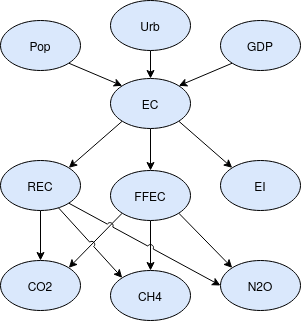

- **Pop**: Crecimiento poblacional anual (%)
- **Urb**: Crecimiento de la población urbana anual (%)
- **GDP**: Crecimiento anual del PIB per cápita (%)
- **EC**: Uso de energía (kg de petróleo equivalente per cápita) - Crecimiento anual (%)
- **FFEC**: Consumo de energía de combustibles fósiles (% del total) - Crecimiento anual (%)
- **REC**: Consumo de energía renovable (% del total del consumo final de energía) - Crecimiento anual (%)
- **EI**: Importaciones netas de energía (% del uso total de energía) - Crecimiento anual (%)
- **CO2**: Emisiones de CO2 (toneladas métricas per cápita) - Crecimiento anual (%)
- **CH4**: Emisiones de metano en el sector energético (miles de toneladas métricas de CO2 equivalente) - Crecimiento anual (%)
- **N2O**: Emisiones de óxidos de nitrógeno en el sector energético (miles de toneladas métricas de CO2 equivalente) - Crecimiento anual (%)


Crearemos esta Red Bayesiana usando la librería de [pgmpy](https://github.com/pgmpy/pgmpy).

In [33]:
from pgmpy.models import BayesianNetwork

model = BayesianNetwork([('Pop', 'EC'),   ('Urb', 'EC'),   ('GDP', 'EC'),
                       ('EC', 'FFEC'),  ('EC', 'REC'),   ('EC', 'EI'),
                       ('REC', 'CO2'),  ('REC', 'CH4'),  ('REC', 'N2O'),
                       ('FFEC', 'CO2'), ('FFEC', 'CH4'), ('FFEC', 'N2O')])

## Lectura de los datos

Antes de leer el dataset, importamos todas las librerías necesarias para poder desarrollar el notebook.

In [34]:
#Matplotlib and networkx are used to plot the graph
import matplotlib.pyplot as plt
import networkx as nx

#Essential python libraries
import numpy as np
import pandas as pd

#Pgmpy modules used throughout the code
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
from IPython.core.display import display, HTML

In [39]:
df = pd.read_csv("italy-data.csv")
df.head()

,Pop,Urb,GDP,EC,FFEC,REC,EI,CO2,CH4,N2O
0,C: +0.50 to +1.99,C: +0.82 to +2.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C: +0.50 to +1.99,C: +0.82 to +2.84,C: +2.89 to +7.49,C: +2.79 to +13.06,C: +0.16 to +2.34,NaN,C: +0.78 to +5.75,C: +3.81 to +17.59,NaN,NaN
2,C: +0.50 to +1.99,C: +0.82 to +2.84,C: +2.89 to +7.49,C: +2.79 to +13.06,C: +0.16 to +2.34,NaN,C: +0.78 to +5.75,C: +3.81 to +17.59,NaN,NaN
3,C: +0.50 to +1.99,C: +0.82 to +2.84,C: +2.89 to +7.49,C: +2.79 to +13.06,B: -0.40 to +0.16,NaN,C: +0.78 to +5.75,C: +3.81 to +17.59,NaN,NaN
4,C: +0.50 to +1.99,C: +0.82 to +2.84,B: +1.24 to +2.89,C: +2.79 to +13.06,C: +0.16 to +2.34,NaN,B: -0.38 to +0.78,C: +3.81 to +17.59,NaN,NaN


## Aprendiendo los parámetros de la red

Para realizar el análisis paramétrico, se emplearán los dos métodos estudiados: la estimación bayesiana y la estimación con máxima verosimilitud (MLE).

### Estimación bayesiana

La Estimación Bayesiana es un enfoque probabilístico que combina una distribución inicial, conocida como distribución a priori, con los datos observados para calcular una nueva distribución, llamada distribución a posteriori. Este método permite incorporar conocimientos previos al proceso de aprendizaje, lo que resulta especialmente útil cuando los datos son escasos o incompletos.

En este caso, usaremos la distribución a priori conocida como la Bayesian Dirichlet Equivalent Uniform Prior (BDeu), la cual introduce pseudo-cuentos que garantizan una representación más conservadora y robusta de las probabilidades condicionales. De este modo, se obtiene un modelo más generalizable y menos susceptible a las fluctuaciones de los datos.

In [36]:
# disable text wrapping in output cell
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []
model.fit(data=df,
          estimator=BayesianEstimator,
          prior_type="bdeu",
          equivalent_sample_size=10)

print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of Pop:
+------------------------+----------+
| Pop(A: -0.19 to +0.07) | 0.338164 |
+------------------------+----------+
| Pop(B: +0.07 to +0.50) | 0.338164 |
+------------------------+----------+
| Pop(C: +0.50 to +1.99) | 0.323671 |
+------------------------+----------+ 

CPT of EC:
+------------------------+-----+------------------------+
| GDP                    | ... | GDP(C: +2.89 to +7.49) |
+------------------------+-----+------------------------+
| Pop                    | ... | Pop(C: +0.50 to +1.99) |
+------------------------+-----+------------------------+
| Urb                    | ... | Urb(C: +0.82 to +2.84) |
+------------------------+-----+------------------------+
| EC(A: -7.05 to -0.12)  | ... | 0.010857763300760043   |
+------------------------+-----+------------------------+
| EC(B: -0.12 to +2.79)  | ... | 0.09880564603691641    |
+------------------------+-----+------------------------+
| EC(C: +2.79 to +13.06) | ... | 0.8903365906623236 

### Estimación con máxima verosimilitud (MLE)

La Estimación por Máxima Verosimilitud (MLE) es un enfoque estadístico que busca determinar los valores de los parámetros de un modelo que maximizan la probabilidad de los datos observados. Este método se basa únicamente en los datos disponibles, sin hacer suposiciones adicionales sobre distribuciones previas, lo que lo convierte en un enfoque directo y objetivo.

En el caso de las redes bayesianas con variables discretas, MLE estima las probabilidades condicionales de los nodos considerando únicamente las frecuencias observadas en los datos.

In [37]:
# disable text wrapping in output cell
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []
model.fit(data=df,
          estimator=MaximumLikelihoodEstimator)

print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of Pop:
+------------------------+----------+
| Pop(A: -0.19 to +0.07) | 0.338983 |
+------------------------+----------+
| Pop(B: +0.07 to +0.50) | 0.338983 |
+------------------------+----------+
| Pop(C: +0.50 to +1.99) | 0.322034 |
+------------------------+----------+ 

CPT of EC:
+------------------------+-----+------------------------+
| GDP                    | ... | GDP(C: +2.89 to +7.49) |
+------------------------+-----+------------------------+
| Pop                    | ... | Pop(C: +0.50 to +1.99) |
+------------------------+-----+------------------------+
| Urb                    | ... | Urb(C: +0.82 to +2.84) |
+------------------------+-----+------------------------+
| EC(A: -7.05 to -0.12)  | ... | 0.0                    |
+------------------------+-----+------------------------+
| EC(B: -0.12 to +2.79)  | ... | 0.09090909090909091    |
+------------------------+-----+------------------------+
| EC(C: +2.79 to +13.06) | ... | 0.9090909090909091 